In [1]:
import pandas as pd

In [2]:


ruta_del_archivo = "./data/global_food_wastage_dataset.csv" 

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(ruta_del_archivo)

In [3]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [24]:
df_2022 = df[df['Year'] == 2022]
df_2022.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
11,Japan,2022,Frozen Food,41025.90,35437.90,49.95,1219.43,33.79
14,USA,2022,Bakery Items,32457.98,27905.84,46.77,865.60,46.46
18,UK,2022,Meat & Seafood,25829.56,20806.34,119.62,185.01,32.51
32,Argentina,2022,Bakery Items,17868.63,20588.93,82.52,897.76,54.59


In [25]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 2 to 4989
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    678 non-null    object 
 1   Year                       678 non-null    int64  
 2   Food Category              678 non-null    object 
 3   Total Waste (Tons)         678 non-null    float64
 4   Economic Loss (Million $)  678 non-null    float64
 5   Avg Waste per Capita (Kg)  678 non-null    float64
 6   Population (Million)       678 non-null    float64
 7   Household Waste (%)        678 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 47.7+ KB


In [30]:
Food_Category = df["Food Category"].unique()
Food_Category

array(['Fruits & Vegetables', 'Prepared Food', 'Dairy Products',
       'Beverages', 'Meat & Seafood', 'Grains & Cereals', 'Frozen Food',
       'Bakery Items'], dtype=object)

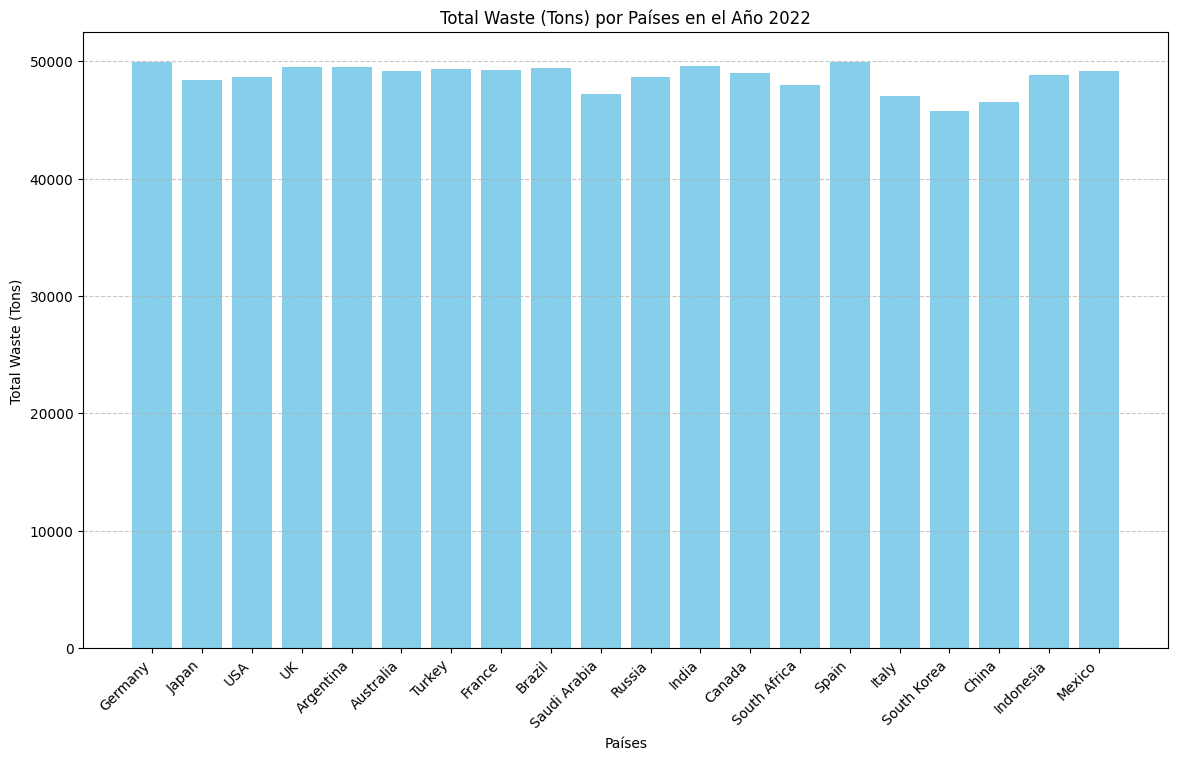

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras con matplotlib
plt.figure(figsize=(14, 8))

# Dibujar las barras sin bordes
bars = plt.bar(df_2022['Country'], df_2022['Total Waste (Tons)'], color='skyblue', edgecolor='none')

# Añadir título y etiquetas
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje X
plt.title('Total Waste (Tons) por Países en el Año 2022')
plt.xlabel('Países')
plt.ylabel('Total Waste (Tons)')

# Añadir una grilla solo en el eje Y para facilitar la lectura de los valores
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

In [ ]:
df_spain = df[df['Country'] == "Spain"]
df_spain.head()


,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
28,Spain,2021,Fruits & Vegetables,41676.18,43058.29,135.22,1325.54,54.32
88,Spain,2018,Beverages,30435.06,28495.47,131.24,876.44,39.94
109,Spain,2024,Meat & Seafood,33791.28,31479.67,65.90,219.46,30.43
118,Spain,2023,Dairy Products,13937.28,15512.11,108.30,27.87,40.63
123,Spain,2021,Frozen Food,30672.66,31614.27,20.47,470.41,53.25


In [ ]:
##REVISARLO



import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para España
df_spain = df[df['Country'] == 'Spain']

# Filtrar los datos para los años 2014-2024
df_spain = df_spain[(df_spain['Year'] >= 2014) & (df_spain['Year'] <= 2024)]

# Crear una lista con las categorías de comida únicas
categories = df_spain['category food'].unique()

# Crear una figura con subgráficos (un gráfico por cada categoría de comida)
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 6 * len(categories)))

# Si solo hay una categoría, `axes` será un solo objeto, no una lista
if len(categories) == 1:
    axes = [axes]

# Crear un gráfico por cada categoría de comida
for i, category in enumerate(categories):
    # Filtrar los datos para la categoría actual
    df_category = df_spain[df_spain['category food'] == category]
    
    # Agrupar los datos por año y sumar los residuos por cada categoría
    df_category_grouped = df_category.groupby('Year')['Total Waste (Tons)'].sum()
    
    # Crear el gráfico de evolución para la categoría
    axes[i].plot(df_category_grouped.index, df_category_grouped.values, marker='o', color='tab:blue', linestyle='-', linewidth=2)
    
    # Añadir título y etiquetas
    axes[i].set_title(f'Evolución de Residuos - {category}', fontsize=14)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Residuos (Tons)')
    axes[i].grid(True)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
